In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
from sklearn.cluster import KMeans

#Scripts para leer y procesar imagen
sys.path.insert(0, '../Golden Master (AS IS)')
import readImage
import preProcessing as pP
import sorts as srt
import perspective as pPe
import indAnalysis as inA
import writeImage2

Im happy...


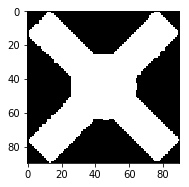

In [2]:
mask_x = readImage.readLocal("../../Imagenes/mask_x_old.png")
plt.subplot(121), plt.imshow(cv2.cvtColor(mask_x,cv2.COLOR_BGR2RGB))
plt.show()

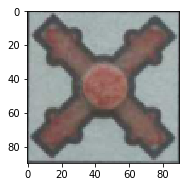

In [4]:
xm_imgBGR = readImage.readLocal("../../Imagenes XM/601170500100157_001_05.png")
xm_imgBGR_resized = inA.resizeFixed(xm_imgBGR)
plt.subplot(121), plt.imshow(cv2.cvtColor(xm_imgBGR_resized,cv2.COLOR_BGR2RGB))
plt.show()

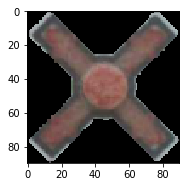

In [5]:
ret, mask_x_binary = cv2.threshold(pP.BGR2gray(mask_x),127,255,cv2.THRESH_BINARY)
xm_imgBGR_mask = cv2.bitwise_and(xm_imgBGR_resized, xm_imgBGR_resized, mask = mask_x_binary)
plt.subplot(121), plt.imshow(cv2.cvtColor(xm_imgBGR_mask,cv2.COLOR_BGR2RGB))
plt.show()

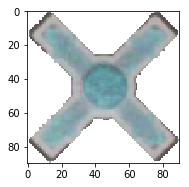

In [6]:
xm_imgBGR_mask_inv = ~xm_imgBGR_mask
plt.subplot(121), plt.imshow(cv2.cvtColor(xm_imgBGR_mask_inv,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
xm_imgHSV_mask_inv = cv2.cvtColor(xm_imgBGR_mask_inv, cv2.COLOR_BGR2HSV)
xm_imgHSV_mask_inv[0,0]

array([  0,   0, 255], dtype=uint8)

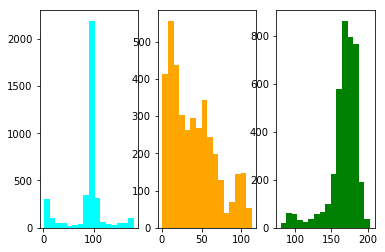

In [8]:
h,s,v = cv2.split(xm_imgHSV_mask_inv)
plt.subplot(131),  
plt.hist(h.flatten()[h.flatten() != 0] , bins = 16, color = ['cyan'])  
plt.subplot(132),  
plt.hist(s.flatten()[s.flatten() != 0], bins = 16, color = ['orange'])
plt.subplot(133),  
plt.hist(v.flatten()[v.flatten() != 255], bins = 16, color = ['green'])
plt.show()

In [9]:
np.median(h.flatten()[h.flatten() != 0])

95.0

In [10]:
from scipy import stats
list(stats.mode(h.flatten()[h.flatten() != 0]))

[array([93], dtype=uint8), array([329])]

In [11]:
np.mean(h.flatten()[h.flatten() != 0])

89.19308889475073

In [12]:
np.var(h.flatten()[h.flatten() != 0])

1178.1737427932055

In [13]:
np.std(h.flatten()[h.flatten() !=0 ])

34.324535580153238

In [14]:
np.std(h.flatten()[(h.flatten() >= 50) & (h.flatten() <= 150)])

11.039595684376888